This script tries to develop Classification model for Heart disease detection in binary way. The used dataset is the one below:

https://www.kaggle.com/datasets/eishkaran/heart-disease

An 80% accuracy is reached by using two layers Fully Connected Neural Network

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from sklearn.utils import shuffle

In [2]:
ds_features = []
labels = []

#read  csv file
with open('/kaggle/input/heart-disease/heart_statlog_cleveland_hungary_final.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    columns = next(reader) #skip first line
    for row in reader:
        ds_features.append(row[:-1])
        labels.append(row[-1])

In [3]:

ds_features = np.array(ds_features).astype('float32')

labels = np.array(labels)

print(ds_features.shape)
print(ds_features[:5])

(1190, 11)
[[ 40.    1.    2.  140.  289.    0.    0.  172.    0.    0.    1. ]
 [ 49.    0.    3.  160.  180.    0.    0.  156.    0.    1.    2. ]
 [ 37.    1.    2.  130.  283.    0.    1.   98.    0.    0.    1. ]
 [ 48.    0.    4.  138.  214.    0.    0.  108.    1.    1.5   2. ]
 [ 54.    1.    3.  150.  195.    0.    0.  122.    0.    0.    1. ]]


In [4]:
max_values = []
for column in range(ds_features.shape[1]):
    max_values.append(max(ds_features[:, column]))
print(max_values)

[77.0, 1.0, 4.0, 200.0, 603.0, 1.0, 2.0, 202.0, 1.0, 6.2, 3.0]


In [5]:
#data processing: Features normalization
def preprocess():
    tmp_list = []
    for row in ds_features:
        tmp_list.append(row/max_values)
    return tmp_list

In [6]:
X = np.array(preprocess()).astype('float32')
Y = np.array(labels).astype('int')

In [7]:
X, Y = shuffle(X, Y)

split_ratio = 0.8
X_train, Y_train = X[:int(0.8*X.shape[0])], Y[:int(0.8*Y.shape[0])]
X_valid, Y_valid = X[int(0.8*X.shape[0]):], Y[int(0.8*Y.shape[0]):]

In [8]:
print(X_train[0])
print(Y_train[0])
print(X_train[1])
print(Y_train[1])
print(X_train[2])
print(Y_train[2])

[0.44155845 1.         0.25       0.59       0.3018242  0.
 1.         0.8613861  0.         0.         0.33333334]
0
[ 0.85714287  1.          0.75        0.6         0.          0.
  0.5         0.5940594   0.         -0.08064517  0.33333334]
0
[0.77922076 1.         0.75       0.7        0.30679932 0.
 1.         0.7673267  0.         0.48387098 0.6666667 ]
1


In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(952, 11)
(952,)
(238, 11)
(238,)


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')])

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=3e-5, momentum=0.9),
    metrics=['accuracy'])

In [12]:
class EarlyStop(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') is not None and logs.get('accuracy') > 0.80 and logs.get('val_accuracy')  > 0.80:                 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True

In [13]:
early_stop_cb = EarlyStop()

In [14]:
epochs = 4000
history = model.fit(
            X_train, Y_train,
            epochs=epochs,
            validation_data=(X_valid, Y_valid),
            verbose=1,
            callbacks=[early_stop_cb])

Epoch 1/4000
30/30 [==============================] - 4s 10ms/step - loss: 0.7983 - accuracy: 0.4485 - val_loss: 0.7944 - val_accuracy: 0.4622
Epoch 2/4000
30/30 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.4475 - val_loss: 0.7918 - val_accuracy: 0.4580
Epoch 3/4000
30/30 [==============================] - 0s 4ms/step - loss: 0.7928 - accuracy: 0.4454 - val_loss: 0.7891 - val_accuracy: 0.4454
Epoch 4/4000
30/30 [==============================] - 0s 5ms/step - loss: 0.7901 - accuracy: 0.4454 - val_loss: 0.7866 - val_accuracy: 0.4454
Epoch 5/4000
30/30 [==============================] - 0s 4ms/step - loss: 0.7874 - accuracy: 0.4464 - val_loss: 0.7840 - val_accuracy: 0.4538
Epoch 6/4000
30/30 [==============================] - 0s 4ms/step - loss: 0.7847 - accuracy: 0.4517 - val_loss: 0.7816 - val_accuracy: 0.4496
Epoch 7/4000
30/30 [==============================] - 0s 4ms/step - loss: 0.7822 - accuracy: 0.4527 - val_loss: 0.7791 - val_accuracy: 0.4454
Epoch

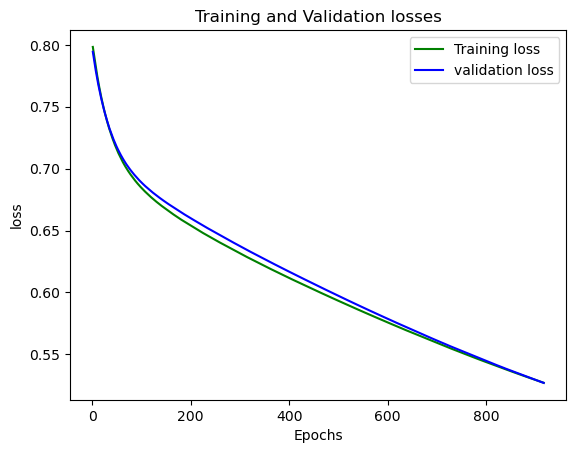

In [15]:
epoch_range = np.arange(1, history.epoch[-1]+2)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epoch_range, train_loss, 'g', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

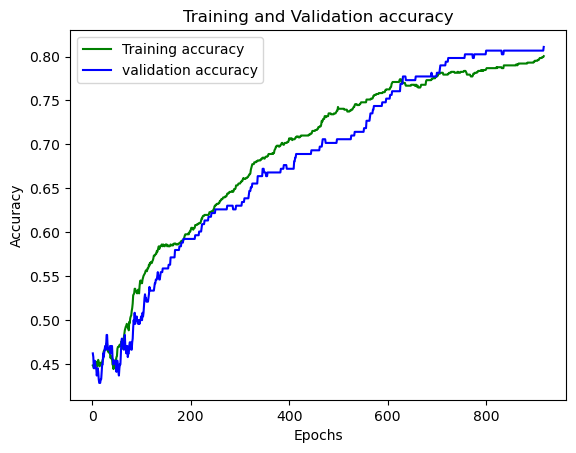

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epoch_range, train_accuracy, 'g', label='Training accuracy')
plt.plot(epoch_range, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()